In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cpc-codes/titles.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/cpc-codes/titles.csv')
df.head()

,code,title,section,class,subclass,group,main_group
0,A,HUMAN NECESSITIES,A,NaN,NaN,NaN,NaN
1,A01,AGRICULTURE; FORESTRY; ANIMAL HUSBANDRY; HUNTI...,A,1.0,NaN,NaN,NaN
2,A01B,SOIL WORKING IN AGRICULTURE OR FORESTRY; PARTS...,A,1.0,B,NaN,NaN
3,A01B1/00,Hand tools (edge trimmers for lawns A01G3/06 ...,A,1.0,B,1.0,0.0
4,A01B1/02,Spades; Shovels {(hand-operated dredgers E02F3...,A,1.0,B,1.0,2.0


In [4]:
df.columns

Index(['code', 'title', 'section', 'class', 'subclass', 'group', 'main_group'], dtype='object')

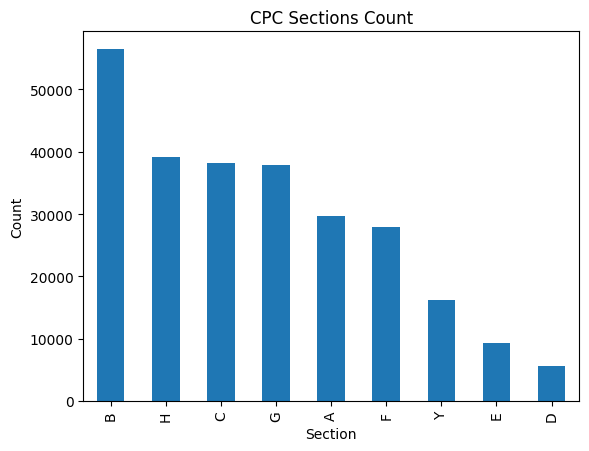

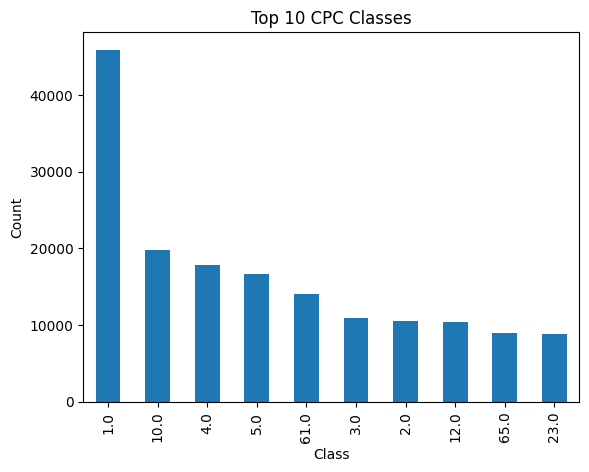

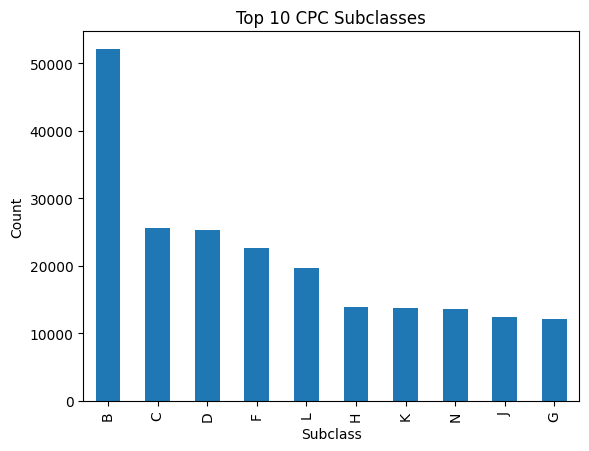

In [5]:
import matplotlib.pyplot as plt

# Plot Section distribution
df['section'].value_counts().plot(kind='bar', title='CPC Sections Count')
plt.xlabel('Section'); plt.ylabel('Count'); plt.show()

# Plot Top 10 Classes
df['class'].value_counts().head(10).plot(kind='bar', title='Top 10 CPC Classes')
plt.xlabel('Class'); plt.ylabel('Count'); plt.show()

# Plot Top 10 Subclasses
df['subclass'].value_counts().head(10).plot(kind='bar', title='Top 10 CPC Subclasses')
plt.xlabel('Subclass'); plt.ylabel('Count'); plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Features (X) and Target (y)
X = df['title']
y = df['section']

In [7]:
# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf.fit_transform(X)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

In [9]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train LightGBM
model = LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.700791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137193
[LightGBM] [Info] Number of data points in the train set: 208380, number of used features: 1000
[LightGBM] [Info] Start training from score -2.169552
[LightGBM] [Info] Start training from score -1.528089
[LightGBM] [Info] Start training from score -1.919704
[LightGBM] [Info] Start training from score -3.824016
[LightGBM] [Info] Start training from score -3.332224
[LightGBM] [Info] Start training from score -2.228206
[LightGBM] [Info] Start training from score -1.931455
[LightGBM] [Info] Start training from score -1.899586
[LightGBM] [Info] Start training from score -2.775337


LGBMClassifier()

In [10]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

           A       0.41      0.19      0.25      5847
           B       0.34      0.69      0.46     11295
           C       0.69      0.60      0.65      7684
           D       0.56      0.20      0.30      1140
           E       0.55      0.20      0.29      1806
           F       0.52      0.39      0.45      5532
           G       0.52      0.44      0.47      7637
           H       0.60      0.48      0.53      7957
           Y       0.55      0.28      0.37      3198

    accuracy                           0.47     52096
   macro avg       0.53      0.39      0.42     52096
weighted avg       0.51      0.47      0.46     52096



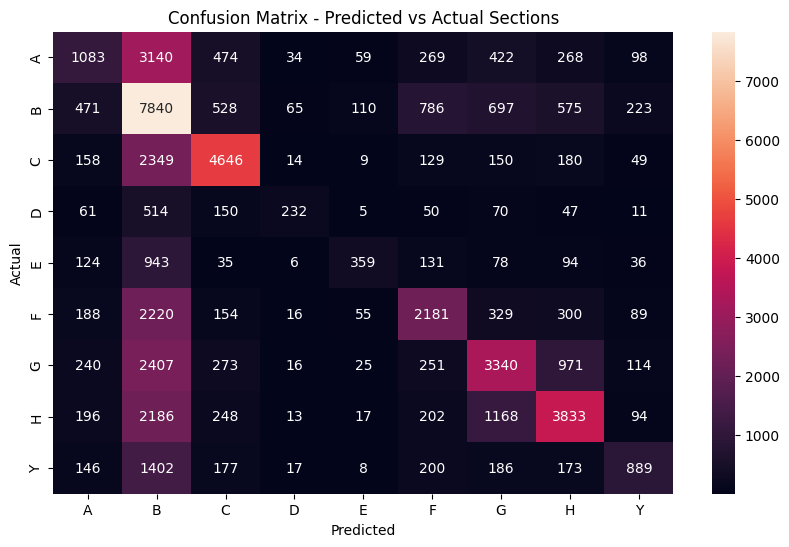

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Predicted vs Actual Sections")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()